<a href="https://colab.research.google.com/github/sne6/Sentimental_Analysis/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATA COLLECTION AND EXPLORATION**

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv('/Reviews.csv')

In [7]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
data.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
value_counts=data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


### **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

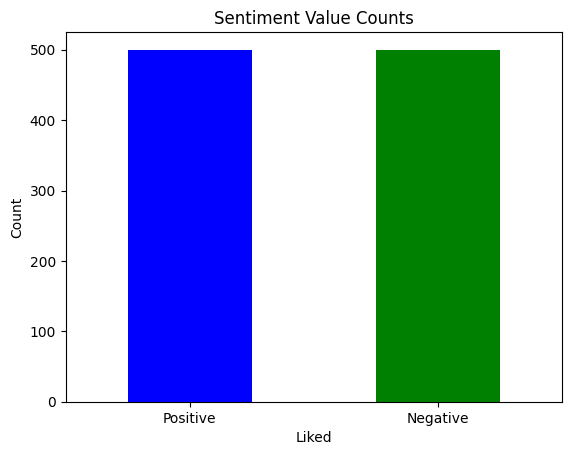

In [ ]:
value_counts.plot(kind='bar' , color=['blue','green'])
plt.xlabel('Liked')
plt.ylabel('Count')
plt.title('Sentiment Value Counts')
plt.xticks(ticks=[0,1],labels=['Positive','Negative'],rotation=0)
plt.show()

In [ ]:
from wordcloud import WordCloud

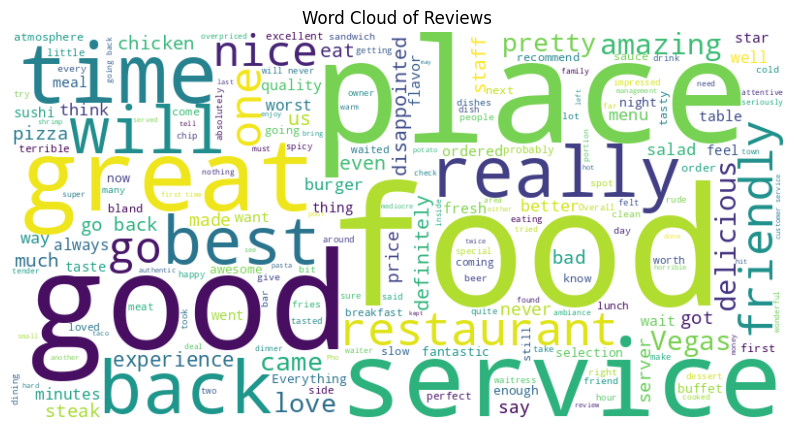

In [ ]:
combined_text=" ".join(data['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [ ]:
from collections import Counter

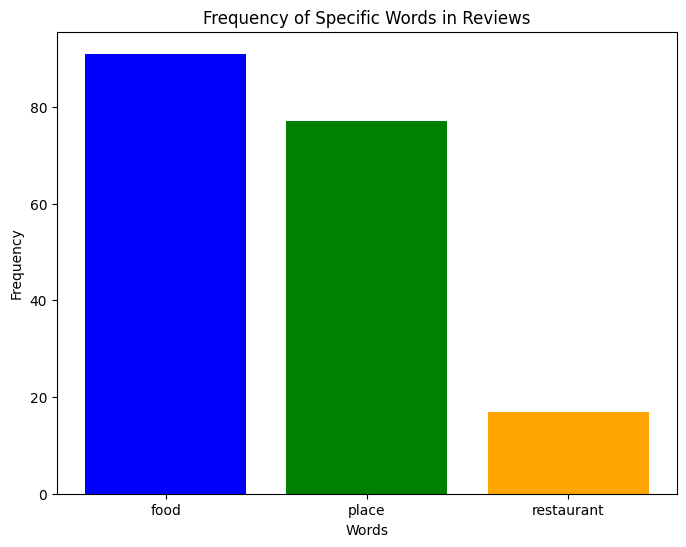

In [ ]:
target_words=['food','place','restaurant']
all_words=' '.join(data['Review']).lower().split()
word_counts=Counter(all_words)
target_word_counts={word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values(),color=['blue','green','orange'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Specific Words in Reviews')
plt.show()

### **TEXT PREPROCESSING**

In [ ]:
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
data['Tokens']=data['Review'].apply(word_tokenize)

In [ ]:
print(data['Tokens'])

0                              [Wow, Loved, this, place]
1                                 [Crust, is, not, good]
2      [Not, tasty, and, the, texture, was, just, nasty]
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                          [Appetite, instantly, gone]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, a...
999    [Then, as, if, I, hadn, t, wasted, enough, of,...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
data['Review'].value_counts()

,count
Review,
NAME,4
I would not recommend this place,2
I love this place,2
I won t be back,2
Will not be back,2
...,...
The burger I got the Gold Standard a 17 burger and was kind of disappointed,1
OMG the food was delicioso,1
There is nothing authentic about this place,1


In [ ]:
import string

In [ ]:
data['Review']=data['Review'].str.replace(f'[{string.punctuation}]',' ',regex=True)
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [ ]:
data['Review'].value_counts()

,count
Review,
NAME,4
I would not recommend this place,2
I love this place,2
I won t be back,2
Will not be back,2
...,...
The burger I got the Gold Standard a 17 burger and was kind of disappointed,1
OMG the food was delicioso,1
There is nothing authentic about this place,1


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer=PorterStemmer()

In [ ]:
data['stemmed']=data['Review'].apply(lambda x:' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [11]:
lemmatizer = WordNetLemmatizer()
data['Lemmatized']=data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [12]:
import re

In [13]:
data['No_Numbers']=data['Review'].apply(lambda x:re.sub(r'\d+',' ',x))
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [26]:
data['cleaned']=data['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]','',x))
print(data['cleaned'])

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: cleaned, Length: 1000, dtype: object


In [24]:
!pip install contractions
import contractions

In [27]:
data['Expanded']=data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [20]:
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.9 MB/s eta 0:00:00


In [22]:
data['emoji']=data['Review'].apply(emoji.demojize)
print(data['emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [28]:
!pip install beautifulsoup4

In [29]:
from bs4 import BeautifulSoup

In [30]:
data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,'html.parser').get_text())
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


### **FEATURE ENGINEERING - TF-IDF VECTORIZATION**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [32]:
X=vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **MODEL BUILDING - SENTIMENT CLASSIFICATION**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [34]:
vectorizer = TfidfVectorizer()

In [35]:
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [39]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.8


In [40]:
print(f'Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



### **PREDICTING SENTIMENT OF NEW REVIEWS**

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
def preprocess_review(review):
  import string
  from nltk.corpus import stopwords
  import re
  from nltk.tokenize import word_tokenize
  from nltk.stem import PorterStemmer
  from nltk.stem import WordNetLemmatizer
  from bs4 import BeautifulSoup
  import contractions
  import emoji
  try:
      nltk.data.find('corpora/stopwords')
  except LookupError:
      nltk.download('stopwords')
  review=review.lower()
  review=BeautifulSoup(review,'html.parser').get_text()
  review=re.sub(f"[{string.punctuation}]",'',review)
  review=contractions.fix(review)
  review=emoji.demojize(review)
  review=word_tokenize(review)
  stop_words=set(stopwords.words('english'))
  tokens = review
  filtered_tokens=[word for word in tokens if word not in stop_words]
  stemmer=PorterStemmer()
  stemmed_tokens=[stemmer.stem(word) for word in filtered_tokens]
  lemmatizer=WordNetLemmatizer()
  lemmatizer  = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]
  cleaned_review=' '.join(lemmatized_tokens)
  return cleaned_review

In [60]:
new_review=input("Enter a review : ")
cleaned_review = preprocess_review(new_review)
new_review_vectorized=vectorizer.transform([cleaned_review])
prediction=model.predict(new_review_vectorized)
if prediction[0]==1:
  print("Positive Review")
else:
  print("Negative Review")

Enter a review : This restaurant has the best ambiance  and service
Positive Review
